In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import make_scorer

# 시계열

from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
import statsmodels.api as sm


from sklearn.metrics import mean_absolute_error

In [58]:
data_dir='C:/Users/kdh2/BIGCON/data/total'
data_list = os.listdir(data_dir)
print(len(data_list))
print(data_list)

40
['2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2016.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2017.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2018.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2019.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2020.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2016.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2017.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2018.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2019.csv', '2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2020.csv', '2020빅콘테스트_스포츠투아이_제공데이터_경기_2016.csv', '2020빅콘테스트_스포츠투아이_제공데이터_경기_2017.csv', '2020빅콘테스트_스포츠투아이_제공데이터_경기_2018.csv', '2020빅콘테스트_스포츠투아이_제공데이터_경기_2019.csv', '2020빅콘테스트_스포츠투아이_제공데이터_경기_2020.csv', '2020빅콘테스트_스포츠투아이_제공데이터_등록선수_2016.csv', '2020빅콘테스트_스포츠투아이_제공데이터_등록선수_2017.csv', '2020빅콘테스트_스포츠투아이_제공데이터_등록선수_2018.csv', '2020빅콘테스트_스포츠투아이_제공데이터_등록선수_2019.csv', '2020빅콘테스트_스포츠투아이_제공데이터_등록선수_2020.csv', '2020빅콘테스트_스포츠투아이_제공데이터_선수_2016.csv', '2020빅콘테스트_스포츠투아이_제공데이터_선수_2017.csv', '2020빅콘테스트_스포츠투아이_제공데이터_선수_2018.csv', '2020빅콘테스트_스포츠투아이_제공데이터_선수_2019.csv', '2020빅콘테스트_스포츠투아이_제공데이터_선수_2020.csv', '2020빅콘테스트_스포츠투아

In [59]:
#항목별 저장
data_list_single_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인타자')]
data_single_hitter = [pd.read_csv(os.path.join(data_dir, data_list_single_hitter[x]), encoding='cp949') for x in range(len(data_list_single_hitter))]
data_list_single_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인투수')]
data_single_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_single_pitcher[x]), encoding='cp949') for x in range(len(data_list_single_pitcher))]
data_list_games = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('경기')]
data_games = [pd.read_csv(os.path.join(data_dir, data_list_games[x]), encoding='cp949') for x in range(len(data_list_games))]
data_list_player_enroll = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('등록선수')]
data_player_enroll = [pd.read_csv(os.path.join(data_dir, data_list_player_enroll[x]), encoding='cp949') for x in range(len(data_list_player_enroll))]
data_list_players = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('선수')]
data_players = [pd.read_csv(os.path.join(data_dir, data_list_players[x]), encoding='cp949') for x in range(len(data_list_players))]
data_list_teams = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀')]
data_teams = [pd.read_csv(os.path.join(data_dir, data_list_teams[x]), encoding='cp949') for x in range(len(data_list_teams))]
data_list_team_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀타자')]
data_team_hitter = [pd.read_csv(os.path.join(data_dir, data_list_team_hitter[x]), encoding='cp949') for x in range(len(data_list_team_hitter))]
data_list_team_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀투수')]
data_team_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_team_pitcher[x]), encoding='cp949') for x in range(len(data_list_team_pitcher))]


In [60]:
team=pd.concat(data_team_hitter,axis=0)


In [61]:
team.columns=['게임키','일자','팀','상대팀코드','더블헤더코드','초말','타자','총타수','타점','득점','안타',
             '2루타','3루타','홈런','도루','도루실패','희타','희비','4구','고4','사구','삼진','병살타','실책','잔루',
             '득점권타율','득점권타수','득점권안타']
for i in range(0,5):
    data_team_hitter[i].columns=['게임키','일자','팀','상대팀코드','더블헤더코드','초말','타자','총타수','타점','득점','안타',
             '2루타','3루타','홈런','도루','도루실패','희타','희비','4구','고4','사구','삼진','병살타','실책','잔루',
             '득점권타율','득점권타수','득점권안타']
    data_team_hitter[i]['타율']=data_team_hitter[i]['안타']/data_team_hitter[i]['총타수']


    

In [70]:
from datetime import datetime as dt
from dateutil.parser import parse
team_2016=data_team_hitter[0]
team_2017=data_team_hitter[1]
team_2018=data_team_hitter[2]
team_2019=data_team_hitter[3]
team_2020=data_team_hitter[4]
df_list=[team,team_2016,team_2017,team_2018,team_2019,team_2020]
for i in df_list:
    i['타율']=i['안타']/i['총타수']
    i['년도']=i['게임키'].apply(lambda x: int(x[:4]))
    i['datetime']=pd.to_datetime(i['게임키'].apply(lambda x: parse(str(x[:8])+str(x[12:])+'00000',yearfirst=True)),errors='raise')
    i['1루타']=i['안타']-i['2루타']-i['3루타']-i['홈런']
    

In [71]:
team_2016=team_2016.set_index('datetime')
team_2017=team_2017.set_index('datetime')
team_2018=team_2018.set_index('datetime')
team_2019=team_2019.set_index('datetime')
team_2020=team_2020.set_index('datetime')
team=team.set_index('datetime')
team


,게임키,일자,팀,상대팀코드,더블헤더코드,초말,타자,총타수,타점,득점,...,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타,타율,년도,1루타
datetime,,,,,,,,,,,,,,,,,,,,,
2016-04-01,20160401HHLG0,20160401,LG,HH,0,B,47,42,4,5,...,11,0,0,8,0.333333,12,4,0.214286,2016,6
2016-04-01,20160401HHLG0,20160401,HH,LG,0,T,52,46,4,4,...,10,1,2,12,0.200000,15,3,0.282609,2016,11
2016-04-01,20160401HTNC0,20160401,NC,HT,0,B,36,30,5,5,...,9,1,1,7,0.142857,7,1,0.300000,2016,5
2016-04-01,20160401HTNC0,20160401,HT,NC,0,T,38,34,3,4,...,10,1,0,7,0.100000,10,1,0.235294,2016,4
2016-04-01,20160401KTSK0,20160401,SK,KT,0,B,36,36,4,4,...,7,1,1,5,0.375000,8,3,0.277778,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-19,20200719LTSS0,20200719,LT,SS,0,T,31,29,2,2,...,7,3,0,2,0.000000,2,0,0.206897,2020,4
2020-07-19,20200719OBHT0,20200719,HT,OB,0,B,38,32,4,4,...,5,1,0,7,0.571429,7,4,0.250000,2020,7
2020-07-19,20200719OBHT0,20200719,OB,HT,0,T,41,37,8,8,...,4,0,0,6,0.363636,11,4,0.297297,2020,7


# EDA

C:\Users\kdh2\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.
C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


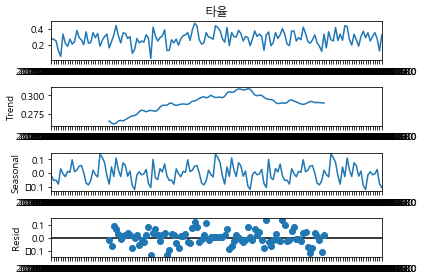

In [10]:
#계졀차분
decomposed_team = sm.tsa.seasonal_decompose(team_2016[team_2016['팀']=='SK']['타율'],freq=50) # The frequncy is annual
figure = decomposed_team.plot()
plt.show()

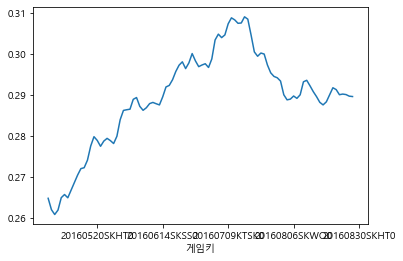

In [11]:
#2016 SK trend plot (non-stationary)
decomposed_team.trend.plot()

C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


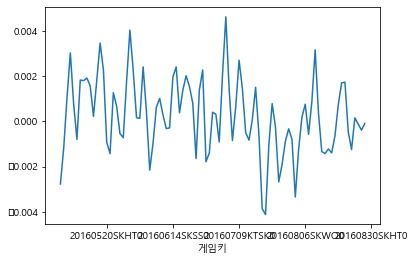

In [12]:
#2016 SK new trend plot (stationary)
decomposed_team.trend.diff().plot()

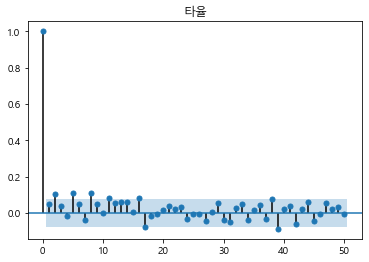

In [13]:
#해봤는데 모든변수가 첫번째 년도 제외하곤 자기상관이 신뢰구간에 안들어오거나 너무 낮다.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(team[team['팀']=='HH']['홈런'],lags=50,title="타율")
plt.show()


In [91]:
team_2016.index = pd.DatetimeIndex(team_2016.index).to_period('d')
test=team_2016[team_2016['팀']=='SK']["타율"].diff().iloc[-20:]
train=team_2016[team_2016['팀']=='SK']["타율"].diff().iloc[1:-20]


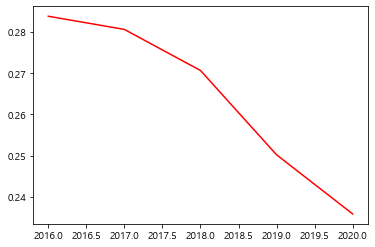

In [173]:
#한화 연도별 타율 변화 추이
years=[2016,2017,2018,2019,2020]
HH_AVG=[]
for i in range(0,5):
    a=data_team_hitter[i].groupby('팀')['타율'].mean().loc['HH']
    HH_AVG.append(a)
plt.plot(years,HH_AVG,'r')    

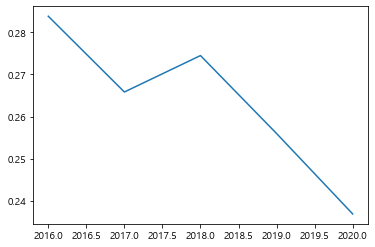

In [174]:
#SK 연도별 타율 변화 추이
years=[2016,2017,2018,2019,2020]
SK_AVG=[]
for i in range(0,5):
    a=data_team_hitter[i].groupby('팀')['타율'].mean().loc['SK']
    SK_AVG.append(a)
plt.plot(years,SK_AVG,) 

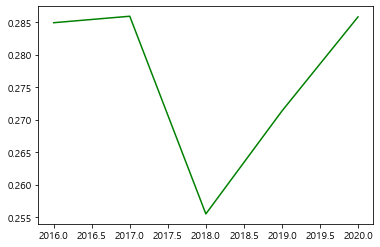

In [175]:
#NC 연도별 타율 변화 추이
years=[2016,2017,2018,2019,2020]
NC_AVG=[]
for i in range(0,5):
    a=data_team_hitter[i].groupby('팀')['타율'].mean().loc['NC']
    NC_AVG.append(a)
plt.plot(years,NC_AVG,'g') 

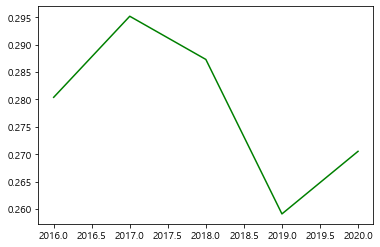

In [176]:
#HT 연도별 타율 변화 추이
years=[2016,2017,2018,2019,2020]
HT_AVG=[]
for i in range(0,5):
    a=data_team_hitter[i].groupby('팀')['타율'].mean().loc['HT']
    HT_AVG.append(a)
plt.plot(years,HT_AVG,'g') 

# Feature Engineering

In [17]:
team['년도']=team['게임키'].apply(lambda x: int(x[:4]))

In [18]:
team['1루타']=team['안타']-team['2루타']-team['3루타']-team['홈런']

In [ ]:
# win_lose_dict={}
# for i in team['게임키'].unique():
#     a=team.groupby(['게임키','팀'])['득점'].sum().loc[i].max()
#     win_lose_dict[i]=a
# 
# team['승패여부']=(team['득점']==team['게임키'].map(win_lose_dict)).astype('int')
# 
# team

In [19]:

#선수별 출루율
# chul=(team['안타']+team['4구']+team['사구'])/(team['총타수']+team['4구']+team['사구']+team['희비'])
# 장타율
# jang=(team['1루타']+2*team['2루타']+3*team['3루타']+4*team['홈런'])/team['총타수']
# jang.fillna(0,inplace=True)
# team['OPS']=chul+jang



# Modeling

# UCM


The M is 0.09718492509902044.


C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


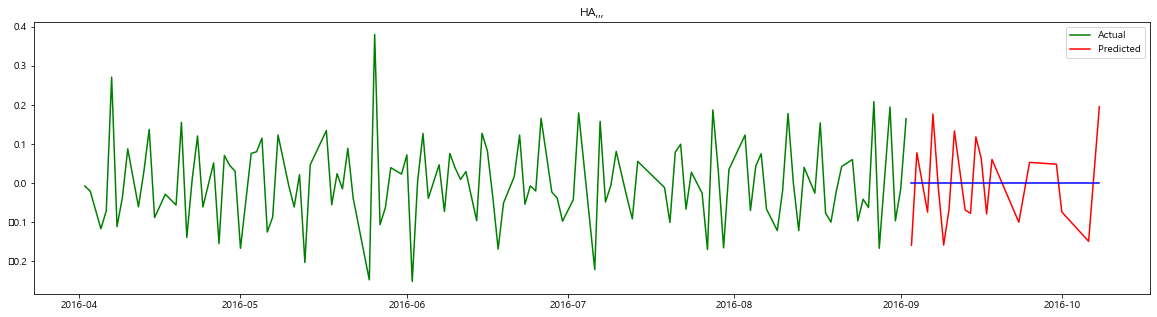

In [92]:

model = sm.tsa.UnobservedComponents(train,'local level')
result = model.fit(maxiter=1000,disp=False)

predicted_result = result.forecast(len(test))

# calculating error
rmse = mean_absolute_error(test, predicted_result)
print("The M is {}.".format(rmse))

plt.figure(figsize=(20,5))

plt.plot(train.index.to_timestamp(),train.values,color='g')
plt.plot(test.index.to_timestamp(),test.values,color='red')
plt.plot(test.index.to_timestamp(),predicted_result,color='blue')

plt.legend(['Actual','Predicted'])
plt.title('HA,,,')
plt.show()


# SARIMA

The MAE is 0.08148413140832607.


C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kdh2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


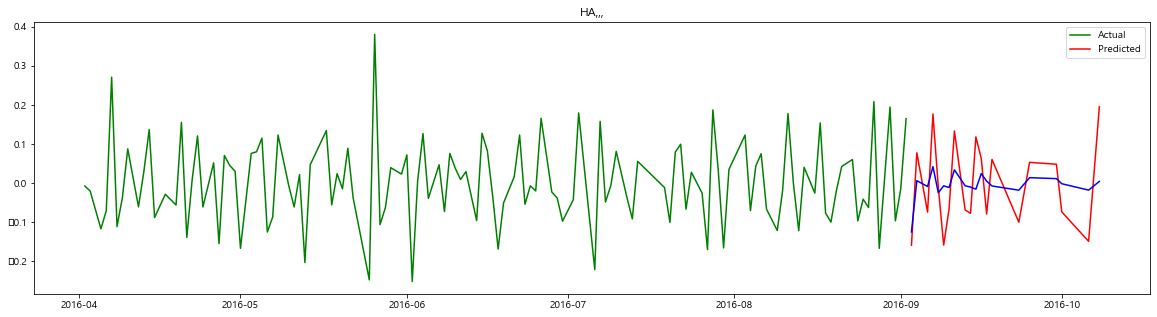

In [94]:

model = sm.tsa.SARIMAX(train,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)

predicted_result = result.forecast(len(test))

rmse = mean_absolute_error(test, predicted_result)

print("The MAE is {}.".format(rmse))

plt.figure(figsize=(20,5))

plt.plot(train.index.to_timestamp(),train.values,color='g')
plt.plot(test.index.to_timestamp(),test.values,color='red')
plt.plot(test.index.to_timestamp(),predicted_result,color='blue')


plt.legend(['Actual','Predicted'])
plt.title('HA,,,')
plt.show()


# Dynamic Factor models

In [185]:

train=team_2016[team_2016['팀']=='SK'][['타율','득점권타율']].iloc[1:-20]
test=team_2016[team_2016['팀']=='SK'][['타율','득점권타율']].iloc[-20:]

The MAE is 0.05744682261588607.


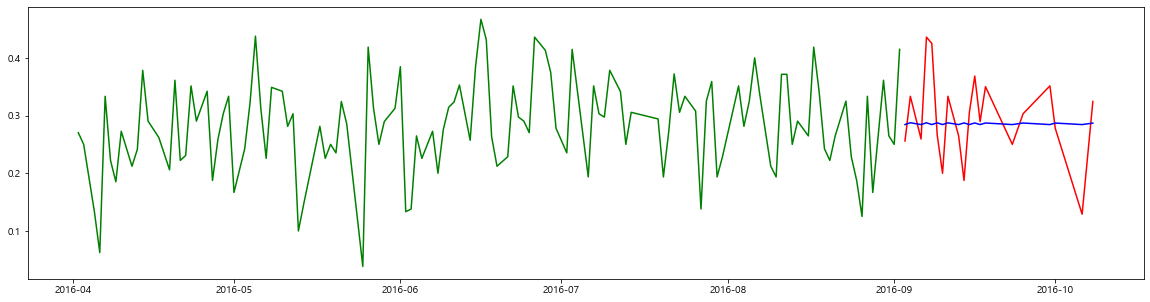

In [186]:
model = sm.tsa.DynamicFactor(train, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)

predicted_result = result.forecast(len(test))



rmse = mean_absolute_error(test['타율'],predicted_result['타율'])

print("The MAE is {}.".format(rmse))

plt.figure(figsize=(20,5))

plt.plot(train.index.to_timestamp(),train['타율'].values,color='g')
plt.plot(test.index.to_timestamp(),test['타율'].values,color='red')
plt.plot(test.index.to_timestamp(),predicted_result['타율'],color='blue')

In [ ]:
#변수를 많이 설정하면 성능이 떨어진다(0에 수렴함)


# VAR model


In [202]:
train=team_2016[team_2016['팀']=='SK'][['타율','안타',]].iloc[1:-20]
test=team_2016[team_2016['팀']=='SK'][['타율','안타']].iloc[-20:]

C:\Users\kdh2\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


The MAE is 0.05957223289702357.


C:\Users\kdh2\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


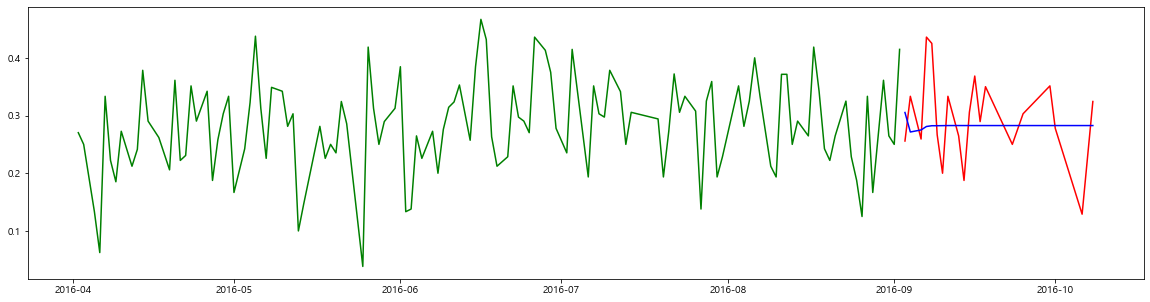

In [203]:
model = sm.tsa.VARMAX(train,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)

predicted_result = result.forecast(len(test))



rmse = mean_absolute_error(test['타율'],predicted_result['타율'])

print("The MAE is {}.".format(rmse))

plt.figure(figsize=(20,5))

plt.plot(train.index.to_timestamp(),train['타율'].values,color='g')
plt.plot(test.index.to_timestamp(),test['타율'].values,color='red')
plt.plot(test.index.to_timestamp(),predicted_result['타율'],color='blue')

In [204]:
team_2016.corr()['타율'].sort_values()

삼진       -0.202798
실책       -0.043349
더블헤더코드   -0.008939
일자        0.052749
도루실패      0.060168
사구        0.065041
고4        0.067155
병살타       0.100949
도루        0.135458
희타        0.138159
4구        0.156453
3루타       0.199978
희비        0.226743
홈런        0.348595
잔루        0.362764
2루타       0.499019
득점권타율     0.567079
총타수       0.622904
타자        0.635675
득점권타수     0.655615
득점권안타     0.744224
득점        0.771786
타점        0.774636
1루타       0.814638
안타        0.954885
타율        1.000000
년도             NaN
Name: 타율, dtype: float64